In [1]:
import pandas as pd

# Specify the encoding as 'latin1'
df = pd.read_csv('Global YouTube Statistics.csv', encoding='latin1')
df.head(5)


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


# show the shape of data

In [2]:
df.shape

(995, 28)

# Show the null values

In [3]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

# To show the null values in specific column

In [4]:
null_values_in_subscribers = df['subscribers'].isnull()
null_count_in_subscribers = null_values_in_subscribers.sum()
print(f"Number of null values in 'subscribers' column: {null_count_in_subscribers}")

Number of null values in 'subscribers' column: 0


# To drop all the null values

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

# Top 5 channels name from India

In [7]:
indian_channels = df[df['Country'] == 'India']
indian_channels_sorted = indian_channels.sort_values(by='rank')
top_5_indian_channel_names = indian_channels_sorted['Youtuber'].head(5)
for name in top_5_indian_channel_names:
    print(name)

T-Series
SET India
Zee Music Company
Sony SAB
Zee TV


# To check the channels name and rank of Pakistan 

In [8]:
pakistan_channels = df[df['Country'] == 'Pakistan']
pakistan_channels_sorted = pakistan_channels.sort_values(by='rank')
top_pakistani_channels = pakistan_channels_sorted[['rank', 'Youtuber']]
print(top_pakistani_channels)

     rank        Youtuber
56     57     HAR PAL GEO
65     66  ARY Digital HD
185   186          HUM TV
818   819        Geo News


# To check the growthing channels in last month

In [9]:
top_growth_channels = df.sort_values(by='subscribers_for_last_30_days', ascending=False)
top_5_growth_channels = top_growth_channels[['Youtuber', 'subscribers_for_last_30_days']].head(5)
print(top_5_growth_channels)

          Youtuber  subscribers_for_last_30_days
2          MrBeast                     8000000.0
417   DaFuq!?Boom!                     6700000.0
117  Jess No Limit                     5500000.0
212      PANDA BOI                     2000000.0
0         T-Series                     2000000.0


# Top 5 channels 

In [10]:
top_5_channels = df.sort_values(by='rank').head(5)
top_5_channel_names = top_5_channels['Youtuber']
print(top_5_channel_names)

0                      T-Series
2                       MrBeast
3    Cocomelon - Nursery Rhymes
4                     SET India
8                   Like Nastya
Name: Youtuber, dtype: object


# To check the channel which created in 2019 to 2020 and also their subscriber of India

In [11]:
indian_channels_2019_2020 = df[(df['Country'] == 'India') & (df['created_year'] >= 2019) & (df['created_year'] <= 2020)]
indian_channels_2019_2020_info = indian_channels_2019_2020[['Youtuber', 'subscribers']]
print(indian_channels_2019_2020_info)

                    Youtuber  subscribers
283                    Tilak     23400000
306               Heroindori     22600000
734           Noman Official     14600000
764           RS 1313 SHORTS     14400000
846  Vijay Kumar Viner Vlogs     13500000
928         Right to Shiksha     12800000


# Check the top 5 channels of entertainment

In [12]:
entertainment_channels = df[df['category'] == 'Entertainment']
top_5_entertainment_channels = entertainment_channels.sort_values(by='subscribers', ascending=False).head(5)
top_5_entertainment_channel_info = top_5_entertainment_channels[['Youtuber', 'subscribers']]
print(top_5_entertainment_channel_info)


         Youtuber  subscribers
2         MrBeast    166000000
9   Vlad and Niki     98900000
21         Zee TV     70500000
36     Marshmello     56400000
46     Get Movies     47500000


# Change the values to Millions

In [13]:
#df['subscribers'] = df['subscribers'] / 1000000
#df['subscribers'] = df['subscribers'].astype(str) + 'M'
#print(df.head(5))
# I face some issues after converting it so thats why i didnt change it 

# Check statistics of subcribers

In [14]:
subscriber_distribution = df['subscribers'].describe()
print(subscriber_distribution)

count    5.540000e+02
mean     2.462401e+07
std      1.950924e+07
min      1.230000e+07
25%      1.490000e+07
50%      1.880000e+07
75%      2.670000e+07
max      2.450000e+08
Name: subscribers, dtype: float64


# Total video views of youtube

In [15]:
total_video_views = df['video views'].sum()
def format_video_views(views):
    if views >= 1_000_000_000:
        return f'{views / 1_000_000_000:.2f} trillion'
    elif views >= 1_000_000:
        return f'{views / 1_000_000:.2f} billion'
    else:
        return f'{views}'
formatted_total_views = format_video_views(total_video_views)
print(formatted_total_views)

7260.77 trillion


# To check the highest and lowest video views channel names

In [16]:
highest_views_channel_name = df[df['video views'] == df['video views'].max()]['Youtuber'].values[0]
lowest_views_channel_name = df[df['video views'] == df['video views'].min()]['Youtuber'].values[0]

print("Channel with the highest video views:", highest_views_channel_name)
print("Channel with the lowest video views:", lowest_views_channel_name)

Channel with the highest video views: T-Series
Channel with the lowest video views: Happy Lives


# Most common channel in youtube

In [17]:
most_common_category = df['category'].mode().values[0]
print(most_common_category)

Entertainment


# Percentage of Channels from Each Country

In [18]:
country_percentage = df['Country'].value_counts(normalize=True) * 100
print(country_percentage)

Country
United States           32.310469
India                   25.090253
Brazil                   5.956679
United Kingdom           4.693141
Indonesia                3.429603
Mexico                   3.068592
Russia                   2.346570
Thailand                 2.346570
Spain                    1.985560
Argentina                1.985560
Colombia                 1.624549
South Korea              1.444043
Philippines              1.083032
Saudi Arabia             1.083032
Canada                   1.083032
Ukraine                  0.902527
United Arab Emirates     0.902527
Pakistan                 0.722022
France                   0.722022
Germany                  0.722022
Japan                    0.722022
Chile                    0.541516
Jordan                   0.541516
Italy                    0.361011
Turkey                   0.361011
Ecuador                  0.361011
Netherlands              0.361011
Vietnam                  0.361011
Egypt                    0.361011
Austra

# Average Number of Videos by Category

In [19]:
average_videos_by_category = df.groupby('category')['uploads'].mean()
print(average_videos_by_category)

category
Autos & Vehicles           1898.500000
Comedy                     1373.525000
Education                  2451.454545
Entertainment             18296.227586
Film & Animation           3381.285714
Gaming                     2844.857143
Howto & Style              1743.000000
Movies                     3553.000000
Music                      2940.636364
News & Politics          138764.619048
Nonprofits & Activism    102912.000000
People & Blogs            15980.194444
Pets & Animals             5932.666667
Science & Technology       2420.636364
Shows                     29730.666667
Sports                    12303.111111
Trailers                   6839.000000
Name: uploads, dtype: float64


# Relationship between Videos Uploaded and Subscribers

In [20]:
videos_subscribers_correlation = df['uploads'].corr(df['subscribers'])
print(videos_subscribers_correlation)

0.07479106414294341


# Channels Created by Year

In [21]:
channels_created_per_year = df['created_year'].value_counts().sort_index()
print(channels_created_per_year)

created_year
1970.0     1
2005.0    14
2006.0    44
2007.0    28
2008.0    29
2009.0    30
2010.0    19
2011.0    48
2012.0    41
2013.0    47
2014.0    66
2015.0    48
2016.0    46
2017.0    37
2018.0    17
2019.0    10
2020.0    17
2021.0    11
2022.0     1
Name: count, dtype: int64


# Seasonal Trends in Channel Creation

In [22]:
channels_created_per_month = df['created_month'].value_counts().sort_index()
print(channels_created_per_month)

created_month
Apr    37
Aug    43
Dec    34
Feb    40
Jan    61
Jul    52
Jun    40
Mar    50
May    50
Nov    45
Oct    47
Sep    55
Name: count, dtype: int64


# statistics of Gross tertiary education enrollment (%)

In [23]:
education_distribution = df['Gross tertiary education enrollment (%)'].describe()
print(education_distribution)

count    554.000000
mean      60.533574
std       26.365440
min        7.600000
25%       28.100000
50%       60.000000
75%       88.200000
max      113.100000
Name: Gross tertiary education enrollment (%), dtype: float64


# To show the top 5 category which gained more subscriber in 2020

In [24]:
df_2020 = df[df['created_year'] == 2020]
subscriber_count_2020_category = df_2020.groupby('category')['subscribers'].sum().reset_index()
top_categories_2020 = subscriber_count_2020_category.nlargest(5, 'subscribers')
print(top_categories_2020)

           category  subscribers
2     Entertainment    122400000
0            Comedy     93200000
6    People & Blogs     37100000
7    Pets & Animals     23700000
3  Film & Animation     23400000


# The top 5 countries with the most subscribers

In [25]:
top_countries = df.groupby('Country')['subscribers'].sum().reset_index()
top_5_countries = top_countries.nlargest(5, 'subscribers')
print(top_5_countries)

           Country  subscribers
39   United States   4546100000
14           India   3828000000
3           Brazil    683300000
38  United Kingdom    542000000
15       Indonesia    383800000


# The top 5 countries with the most video views in 2020

In [26]:
df_2020 = df[df['created_year'] == 2020]
top_countries_2020 = df_2020.groupby('Country')['video views'].sum().reset_index()
top_5_countries_2020 = top_countries_2020.nlargest(5, 'video views')
print(top_5_countries_2020)

         Country   video views
8  United States  1.010299e+11
1          India  3.457812e+10
4         Latvia  2.091940e+10
2          Italy  1.721160e+10
3          Japan  1.609753e+10


# Total channels

In [27]:
total_channels = df.shape[0]
print("Total number of channels:", total_channels)

Total number of channels: 554


# Visualization

# Get the top 10 YouTubers by subscribers

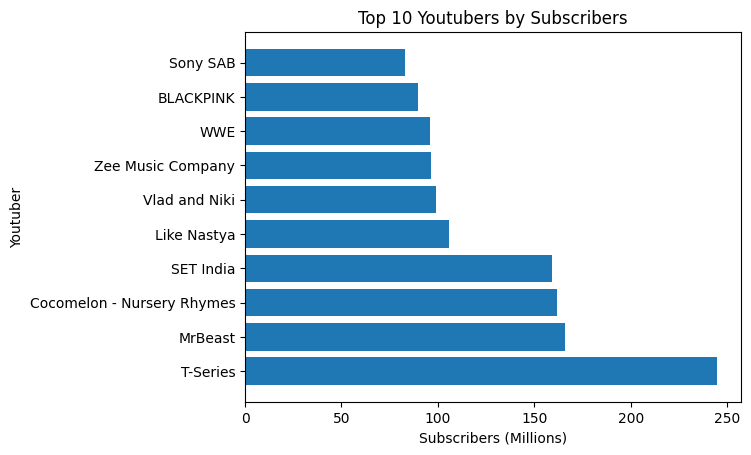

In [28]:
import matplotlib.pyplot as plt
top_youtubers = df.nlargest(10, 'subscribers')
top_youtubers['subscribers'] = top_youtubers['subscribers'] / 1_000_000  # Divide by 1 million
plt.barh(top_youtubers['Youtuber'], top_youtubers['subscribers'])
plt.xlabel('Subscribers (Millions)')  # Update the x-axis label
plt.ylabel('Youtuber')
plt.title('Top 10 Youtubers by Subscribers')
plt.show()

#  Get Top 10 Countries by Subscribers

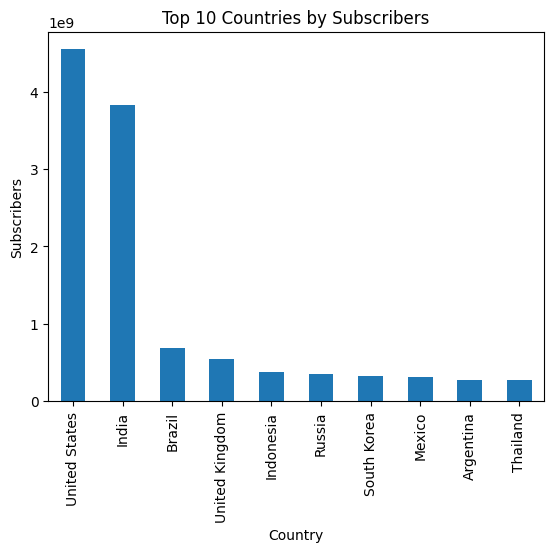

In [29]:
import matplotlib.pyplot as plt
country_subscribers = df.groupby('Country')['subscribers'].sum().sort_values(ascending=False).head(10)
country_subscribers.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Subscribers')
plt.title('Top 10 Countries by Subscribers')
plt.show()

# Distribution of Channel Types

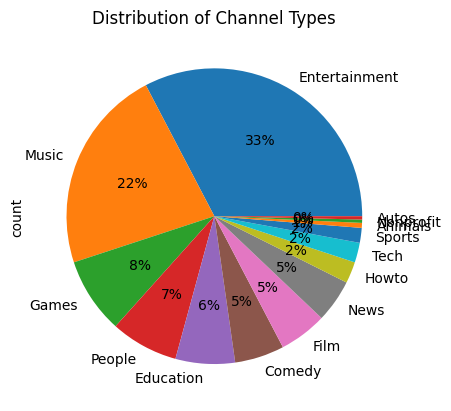

In [30]:
import matplotlib.pyplot as plt
channel_type_counts = df['channel_type'].value_counts()
channel_type_counts.plot(kind='pie', autopct='%1.0f%%')
plt.title('Distribution of Channel Types')
plt.show()

# Top 10 Channels with the Highest Subscribers in India

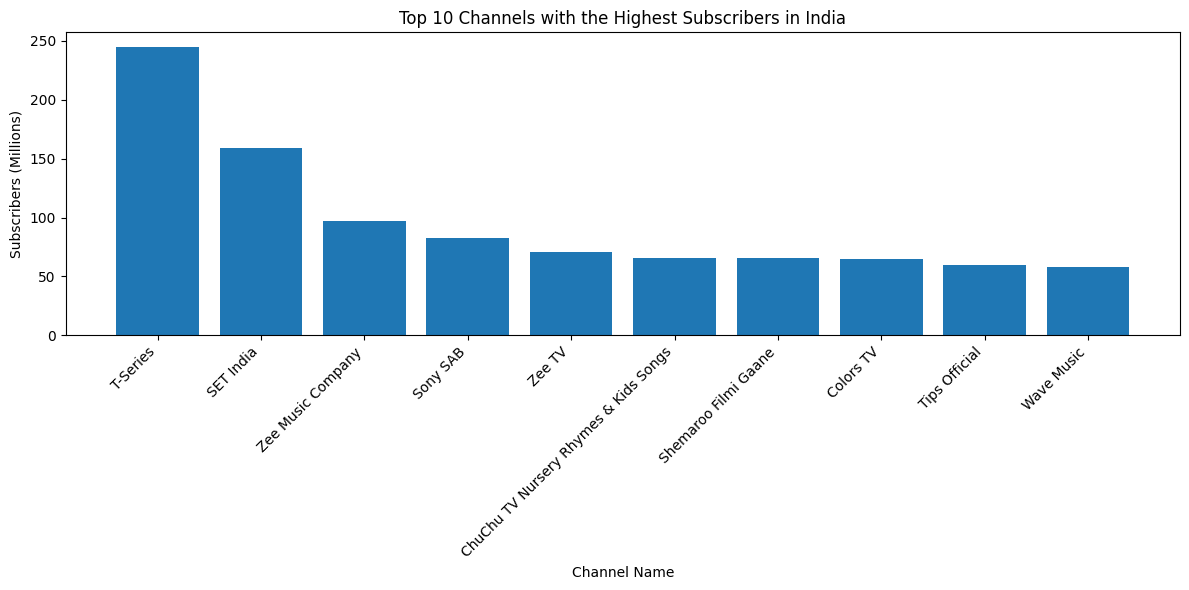

In [31]:
import matplotlib.pyplot as plt
indian_channels = df[df['Country'] == 'India']
top_indian_channels = indian_channels.sort_values(by='subscribers', ascending=False).head(10)
top_indian_channels['subscribers_millions'] = top_indian_channels['subscribers'] / 1e6
plt.figure(figsize=(12, 6))
plt.bar(top_indian_channels['Youtuber'], top_indian_channels['subscribers_millions'])
plt.xlabel('Channel Name')
plt.ylabel('Subscribers (Millions)')
plt.title('Top 10 Channels with the Highest Subscribers in India')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Channel Distribution by Country

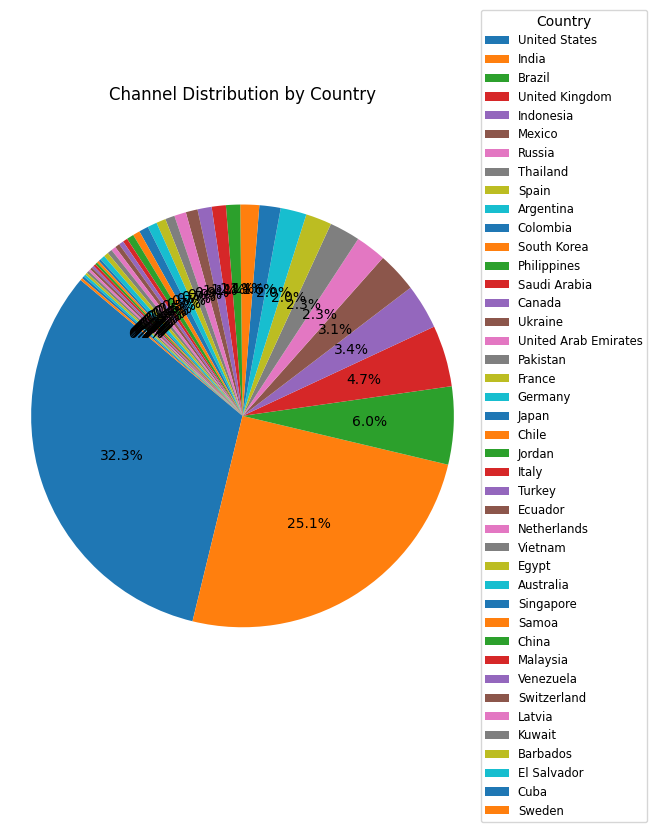

In [32]:
country_counts = df['Country'].value_counts()
plt.figure(figsize=(6, 8))
plt.pie(country_counts, labels=None, autopct='%1.1f%%', startangle=140)
plt.legend(country_counts.index, title="Country", loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small')
plt.axis('equal')
plt.title('Channel Distribution by Country')
plt.show()

# Video views distribution by frequency 

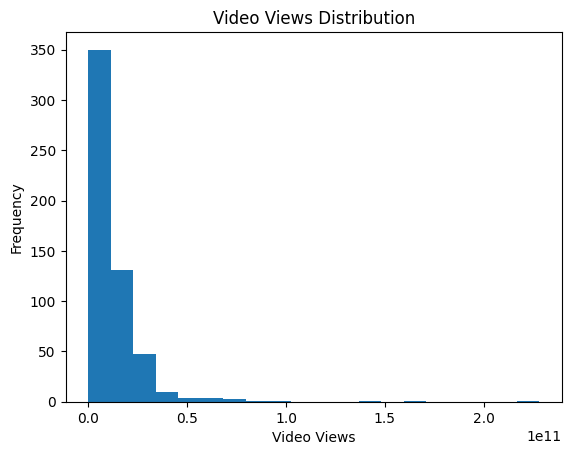

In [33]:
plt.hist(df['video views'], bins=20)
plt.xlabel('Video Views')
plt.ylabel('Frequency')
plt.title('Video Views Distribution')
plt.show()

# Subscribers for Music Category by Top 5 Countries

<Figure size 1500x1000 with 0 Axes>

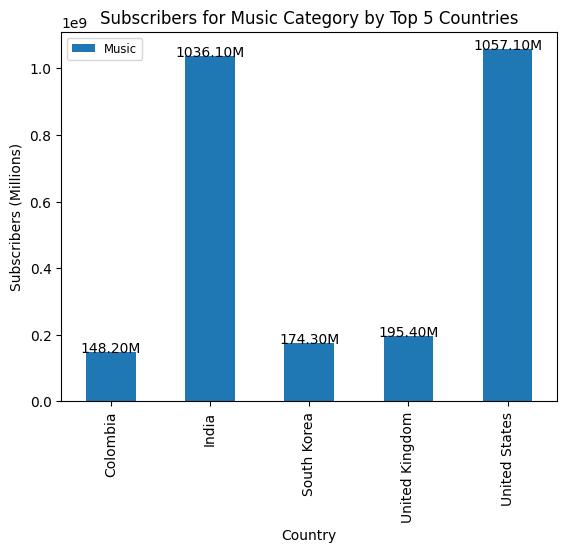

In [34]:
import matplotlib.pyplot as plt
# Filter the data for the "Music" category
music_data = df[df['category'] == 'Music']
top_countries = music_data.groupby('Country')['subscribers'].sum().nlargest(5).index
music_data_top_countries = music_data[music_data['Country'].isin(top_countries)]
stacked_data = music_data_top_countries.groupby(['Country', 'category'])['subscribers'].sum().unstack()
plt.figure(figsize=(15, 10))  # Adjust the figsize to your preference
ax = stacked_data.plot(kind='bar', stacked=True, width=0.5)  # Increase bar width for better visibility
ax.legend(fontsize='small')
plt.xlabel('Country')
plt.ylabel('Subscribers (Millions)')
plt.title('Subscribers for Music Category by Top 5 Countries')
# Add labels on top of the bars (in millions)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height / 1000000:.2f}M', (x + width / 2, y + height), ha='center')
plt.show()

# For multiple numeric data

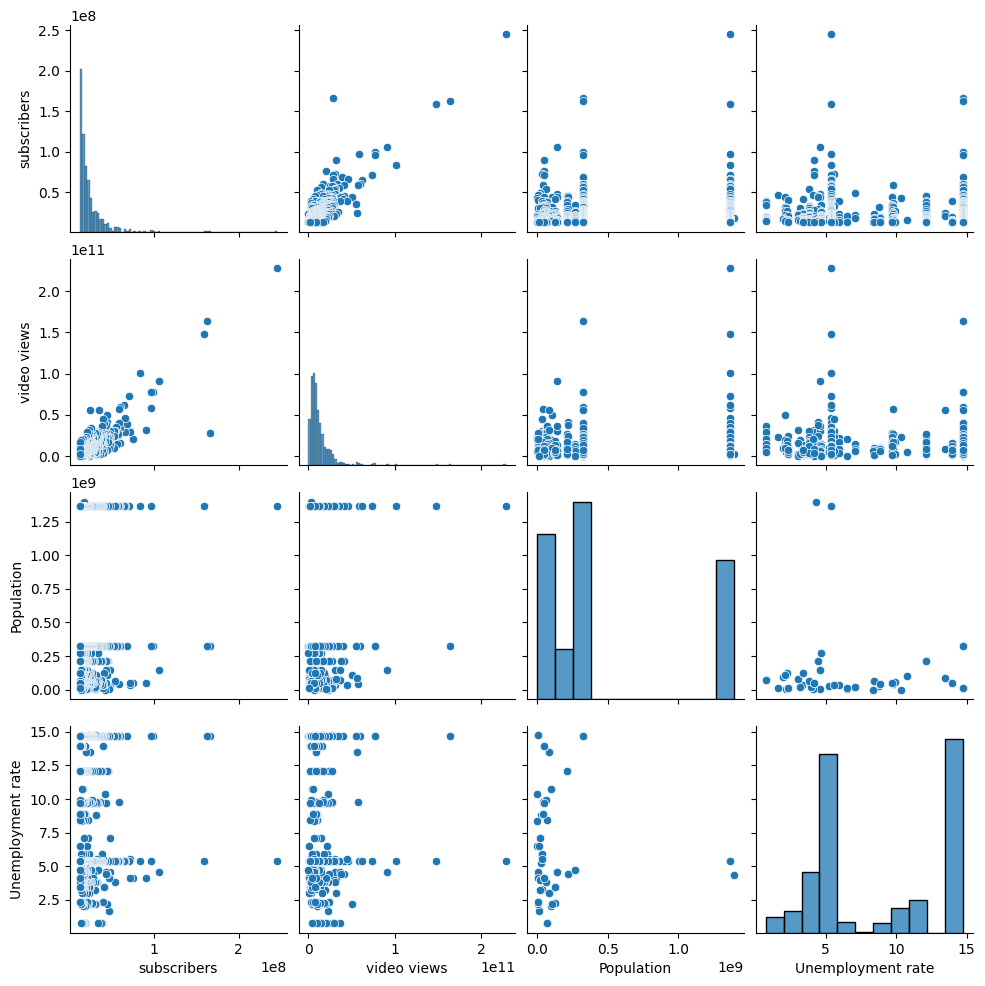

In [35]:
import seaborn as sns
sns.pairplot(df[['subscribers', 'video views', 'Population', 'Unemployment rate']])
plt.show()

# Top 5 Categories by Count

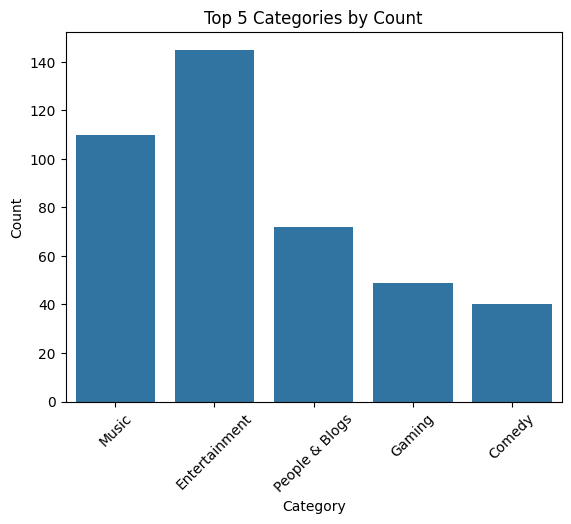

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
top_categories = df['category'].value_counts().head(5).index
# Filter the data for the top 5 categories
df_top_categories = df[df['category'].isin(top_categories)]
sns.countplot(x='category', data=df_top_categories)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 5 Categories by Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()